<a href="https://colab.research.google.com/github/valid999/Speech_Recognition/blob/main/Speech_Recognition_With_WAV2VEC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement with torchaudio
* torchaudio.piplines

### Steps
* Extract the acoustic features from audio waveforms
* Estimate the class of the acoustic features frame by frame
* Generate hypothesis from the sequence of the class probabilites


In [ ]:
# Preparation
import torch
import  torchaudio


print(torch.__version__)
print(torchaudio.__version__)


torch.random.manual_seed(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

2.0.1+cu118
2.0.2+cu118
cuda


In [ ]:
import IPython
import matplotlib.pyplot as plt
from torchaudio.utils import download_asset


SPEECH_FILE = download_asset('tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav')

100%|██████████| 106k/106k [00:00<00:00, 5.63MB/s]


### First we will create the Wav2Vec2 model that performs the feature extraction  and the classification


In [ ]:
bundle = torchaudio.pipelines.WAV2VEC2_ASR_BASE_960H
print("Sample Rate :" , bundle.sample_rate)
print('Labels :' , bundle.get_labels())

Sample Rate : 16000
Labels : ('-', '|', 'E', 'T', 'A', 'O', 'N', 'I', 'H', 'S', 'R', 'D', 'L', 'U', 'M', 'W', 'C', 'F', 'G', 'Y', 'P', 'B', 'V', 'K', "'", 'X', 'J', 'Q', 'Z')


### Fetch the pretrained model

In [ ]:
# Let's  fetch the pretrained model

model = bundle.get_model().to(device)
print(model.__class__)

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960_asr_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960_asr_ls960.pth
100%|██████████| 360M/360M [00:03<00:00, 99.0MB/s]


### Loading the data

In [ ]:
IPython.display.Audio(SPEECH_FILE)

In [ ]:
waveform , sample_rate = torchaudio.load(SPEECH_FILE)
waveform = waveform.to(device)


if sample_rate != bundle.sample_rate:
  waveform = torchaudio.functional.resample(waveform , sample_rate , bundle.sample_rate)

## Extracting acoustic features

In [ ]:
with torch.inference_mode():
  features , _ = model.extract_features(waveform)

### The returned features is a list of tensor . Each tensor is the output of a transformer layer.


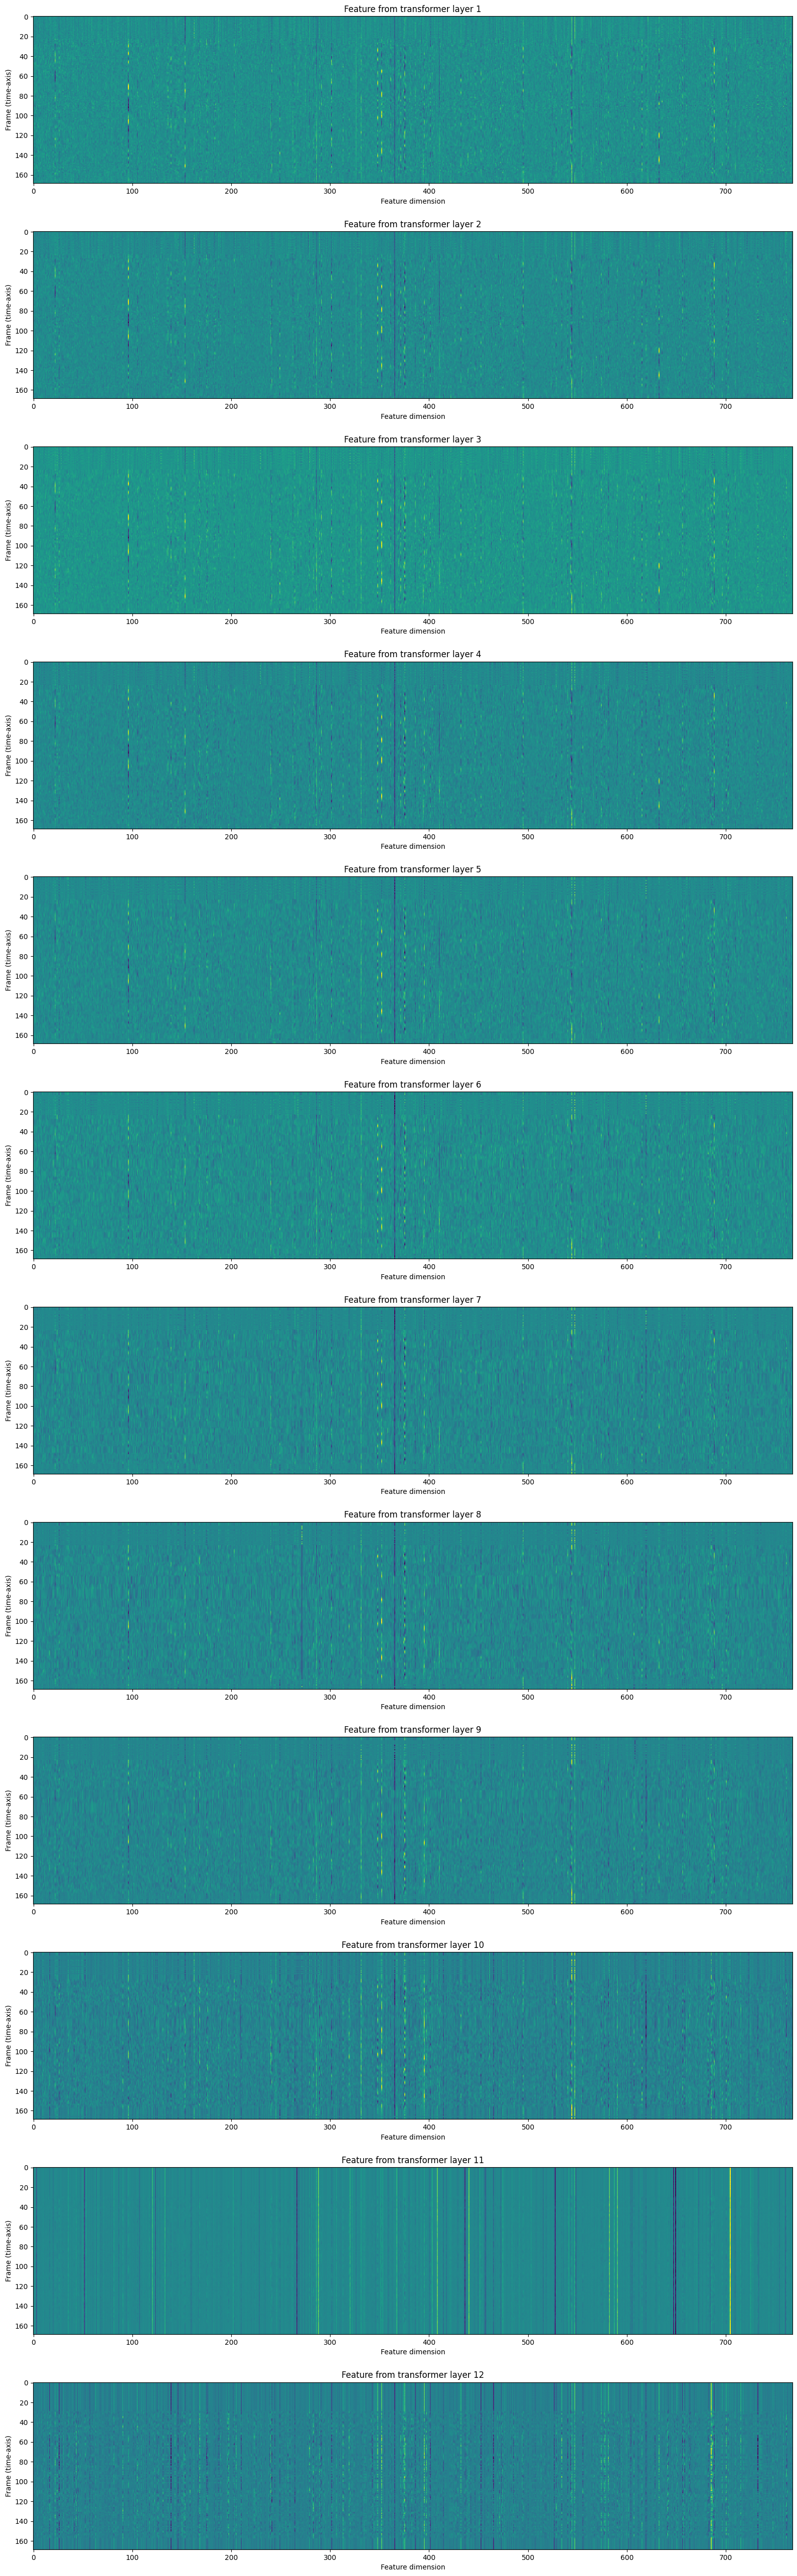

In [ ]:
fig , ax = plt.subplots(len(features) , 1 , figsize = (16 , 4.3*len(features)))
for i , feats in enumerate(features):
  ax[i].imshow(feats[0].cpu() , interpolation = 'nearest')
  ax[i].set_title(f'Feature from transformer layer {i+1}')
  ax[i].set_xlabel("Feature dimension")
  ax[i].set_ylabel('Frame (time-axis)')
fig.tight_layout()